In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

In [21]:
# Step 1: Definining the path to the dataset in the Downloads folder
file_path = '/Users/vedshukla/Library/Mobile Documents/com~apple~CloudDocs/Mobile_user/user_behavior_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [22]:
# Renaming columns to remove spaces and make them shorter
df.columns = [
    'user_id', 
    'device_model', 
    'os', 
    'app_usage_time', 
    'screen_on_time', 
    'battery_drain', 
    'num_apps_installed', 
    'data_usage', 
    'age', 
    'gender', 
    'user_behavior_class'
]

# Dropping the 'user_id' column as it's not needed for clustering
df = df.drop(columns=['user_id'])

In [23]:
# Handling categorical variables (Device Model, OS, Gender)
# For 'device_model' and 'os', used label encoding
df['device_model'] = df['device_model'].map({
    'Google Pixel 5': 0, 
    'OnePlus 9': 1, 
    'Xiaomi Mi 11': 2, 
    'iPhone 12': 3,
    'Samsung Galaxy S21': 4
})

df['os'] = df['os'].map({'Android': 0, 'iOS': 1})

# For 'gender', encoded 'Male' as 0 and 'Female' as 1
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [24]:
df

,device_model,os,app_usage_time,screen_on_time,battery_drain,num_apps_installed,data_usage,age,gender,user_behavior_class
0,0,0,393,6.4,1872,67,1122,40,0,4
1,1,0,268,4.7,1331,42,944,47,1,3
2,2,0,154,4.0,761,32,322,42,0,2
3,0,0,239,4.8,1676,56,871,20,0,3
4,3,1,187,4.3,1367,58,988,31,1,3
...,...,...,...,...,...,...,...,...,...,...
695,3,1,92,3.9,1082,26,381,22,0,2
696,2,0,316,6.8,1965,68,1201,59,0,4
697,0,0,99,3.1,942,22,457,50,1,2
698,4,0,62,1.7,431,13,224,44,0,1


In [25]:
# Step 2: Handling continuous features
#discretize continuous features like 'app_usage_time', 'screen_on_time', 'battery_drain', etc.
from sklearn.preprocessing import KBinsDiscretizer

# Discretizing continuous variables (for example: 'app_usage_time', 'screen_on_time', 'battery_drain', etc.)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Discretizing selected continuous features
df[['app_usage_time', 'screen_on_time', 'battery_drain', 'num_apps_installed', 'data_usage', 'age']] = discretizer.fit_transform(
    df[['app_usage_time', 'screen_on_time', 'battery_drain', 'num_apps_installed', 'data_usage', 'age']]
)

/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [30]:
# Step 3: Splitting the dataset into training and testing sets
X = df.drop(columns=['user_behavior_class'])  # Features
y = df['user_behavior_class']  # Target variable

# Splitting data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Step 4: Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Step 5: Making predictions
y_pred = clf.predict(X_test)

In [35]:
# Step 6: Evaluating the model
from sklearn.metrics import accuracy_score, classification_report

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy * 100:.2f}%")

# Print the classification report for further evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree model: 80.00%

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.59      0.59        46
           2       0.44      0.44      0.44        34
           3       0.93      1.00      0.96        50
           4       1.00      0.91      0.96        47
           5       1.00      1.00      1.00        33

    accuracy                           0.80       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.80      0.80      0.80       210



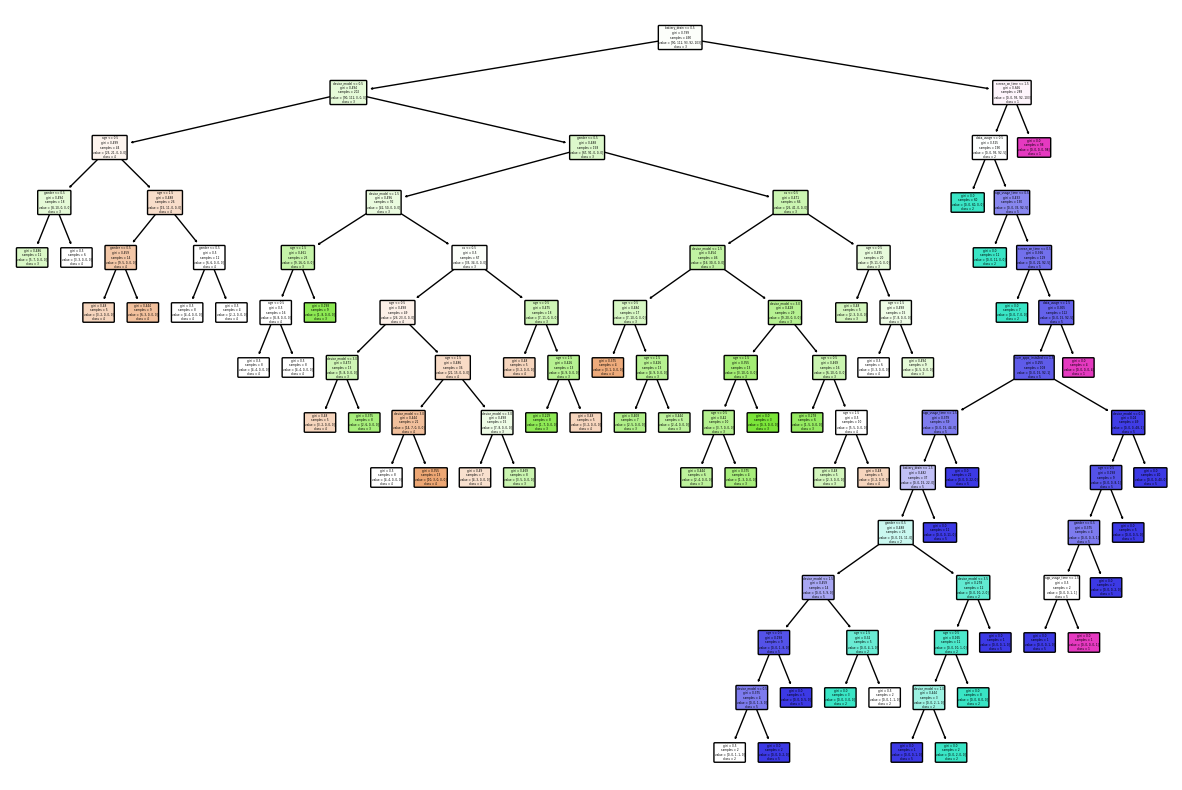

In [38]:
# Step 7: Visualizing the Decision Tree (optional, requires graphviz installed)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names from Pandas Index to a list
feature_names = X.columns.tolist()

# Ensure class_names are string representations of the class labels
class_names = [str(i) for i in y.unique()]

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()


In [39]:
# Step 8: Extracting and displaying the decision tree rules (optional)
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- battery_drain <= 0.50
|   |--- device_model <= 0.50
|   |   |--- age <= 0.50
|   |   |   |--- gender <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- gender >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age >  0.50
|   |   |   |--- age <= 1.50
|   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gender >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  1.50
|   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gender >  0.50
|   |   |   |   |   |--- class: 1
|   |--- device_model >  0.50
|   |   |--- gender <= 0.50
|   |   |   |--- device_model <= 1.50
|   |   |   |   |--- age <= 1.50
|   |   |   |   |   |--- age <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  1.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- device_model >  1.50
|   |   |   |   |--- os <

In [40]:
# Checking the unique values in the 'user_behavior_class' column
print(df['user_behavior_class'].unique())

[4 3 2 5 1]


In [41]:
# Checking the frequency of each class
class_counts = df['user_behavior_class'].value_counts()

print("Class distribution:")
print(class_counts)

Class distribution:
user_behavior_class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [44]:
from sklearn.tree import export_text

# Exporting the decision tree rules in a readable format
tree_rules = export_text(clf, feature_names=df.columns[:-1].tolist())
print(tree_rules)


|--- battery_drain <= 0.50
|   |--- device_model <= 0.50
|   |   |--- age <= 0.50
|   |   |   |--- gender <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- gender >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age >  0.50
|   |   |   |--- age <= 1.50
|   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gender >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  1.50
|   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gender >  0.50
|   |   |   |   |   |--- class: 1
|   |--- device_model >  0.50
|   |   |--- gender <= 0.50
|   |   |   |--- device_model <= 1.50
|   |   |   |   |--- age <= 1.50
|   |   |   |   |   |--- age <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  1.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- device_model >  1.50
|   |   |   |   |--- os <= 0.50
|   |   |   |  

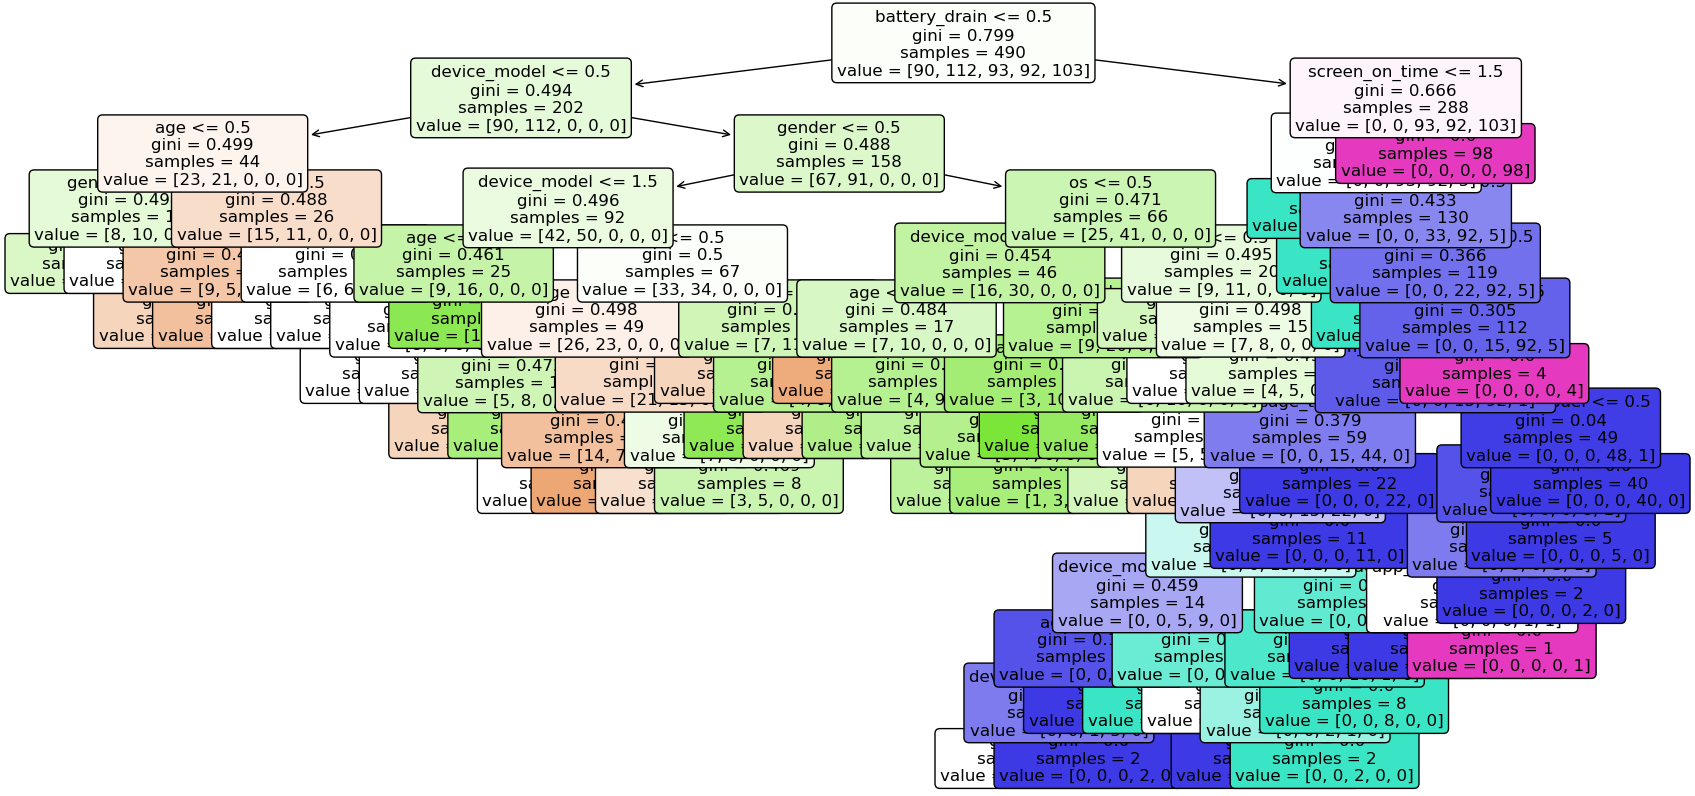

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=df.columns[:-1].tolist(), filled=True, rounded=True, fontsize=12)
plt.show()

In [47]:
import pandas as pd
from sklearn.tree import _tree


def extract_rules(tree, feature_names, max_depth=None):
    # Function to extract and display the decision tree rules in a readable format
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature
    ]
    
    def recurse(node, depth=0):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_child = tree_.children_left[node]
            right_child = tree_.children_right[node]
            if max_depth is None or depth < max_depth:
                print(f"{indent}if {name} <= {threshold:.2f}:")
                recurse(left_child, depth + 1)
                print(f"{indent}else:  (Threshold: {threshold:.2f})")
                recurse(right_child, depth + 1)
        else:
            # Leaf node; printing the class label (the prediction)
            class_label = tree_.value[node].argmax()
            print(f"{indent}Predict: class {class_label} (with {tree_.value[node][0, class_label]} instances)")
    
    recurse(0)  # Starting from the root node

# Call this function on trained decision tree model
extract_rules(clf, df.columns[:-1].tolist())

if battery_drain <= 0.50:
  if device_model <= 0.50:
    if age <= 0.50:
      if gender <= 0.50:
        Predict: class 1 (with 7.0 instances)
      else:  (Threshold: 0.50)
        Predict: class 0 (with 3.0 instances)
    else:  (Threshold: 0.50)
      if age <= 1.50:
        if gender <= 0.50:
          Predict: class 0 (with 3.0 instances)
        else:  (Threshold: 0.50)
          Predict: class 0 (with 6.0 instances)
      else:  (Threshold: 1.50)
        if gender <= 0.50:
          Predict: class 0 (with 4.0 instances)
        else:  (Threshold: 0.50)
          Predict: class 0 (with 2.0 instances)
  else:  (Threshold: 0.50)
    if gender <= 0.50:
      if device_model <= 1.50:
        if age <= 1.50:
          if age <= 0.50:
            Predict: class 0 (with 4.0 instances)
          else:  (Threshold: 0.50)
            Predict: class 0 (with 4.0 instances)
        else:  (Threshold: 1.50)
          Predict: class 1 (with 8.0 instances)
      else:  (Threshold: 1.50)
       

In [50]:
from sklearn.metrics import accuracy_score

# Predicting the test set results
y_pred = clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree model: 80.00%
